In [1]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

# 모든 테이블 전처리 요소 확인

## hackle

In [2]:
device_properties = pd.read_csv('./dumps/hackle_csv/device_properties.csv')
hackle_events = pd.read_csv('./dumps/hackle_csv/hackle_events.csv')
hackle_properties = pd.read_csv('./dumps/hackle_csv/hackle_properties.csv')
user_properties = pd.read_csv('./dumps/hackle_csv/user_properties.csv')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41900\2457705763.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_properties = pd.read_csv('./dumps/hackle_csv/user_properties.csv')


### device_properties

In [4]:
device_properties.head(5)

,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple


In [33]:
# 결측값 없음
device_properties.isnull().sum()

id               0
device_id        0
device_model     0
device_vendor    0
dtype: int64

In [40]:
# 전체 중복값 없음 (id 빼고 확인)
columns = ['device_id',	'device_model',	'device_vendor']

device_properties[device_properties[columns].duplicated(keep=False)]

,id,device_id,device_model,device_vendor


In [10]:
# device_id 중복값 있음 
# 전체 1320개 -> keep='first'하면 660개 (2개씩 중복)
device_properties[device_properties['device_id'].duplicated(keep=False)]

,id,device_id,device_model,device_vendor
16,17,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-A325N,samsung
17,18,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-S911N,samsung
704,705,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A546S,samsung
705,706,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A716S,samsung
1718,1719,01BBBADC-073C-4AEC-8C00-52F0A29577B4,"iPhone12,8",Apple
...,...,...,...,...
250799,250800,fe599a47-85ad-467b-b3e5-ec557117ec80,SM-G991N,samsung
251274,251275,FED7434C-C9F0-4FF2-BB80-8520E37A1E01,"iPhone12,8",Apple
251275,251276,FED7434C-C9F0-4FF2-BB80-8520E37A1E01,"iPhone13,1",Apple
252293,252294,ffeae563-c45e-4f68-85e0-f0373dd940cf,SM-A235N,samsung


In [67]:
# 맨 마지막 id일수록 최신인가?
dup_device_properties = device_properties[device_properties['device_id'].duplicated(keep=False)]
# dup_device_properties['device_vendor'] = dup_device_properties['device_model']
# dup_device_properties['is_new'] = dup_device_properties['device_model']

### hackle_events

In [8]:
hackle_events.head(3)

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,NaN,NaN,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,NaN,NaN,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,NaN,NaN,26.0,174.0,4729.0,NaN


In [ ]:
# 용량이 너무 커서 데이터 개수 안보임
hackle_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_id        object 
 1   event_datetime  object 
 2   event_key       object 
 3   session_id      object 
 4   id              object 
 5   item_name       object 
 6   page_name       object 
 7   friend_count    float64
 8   votes_count     float64
 9   heart_balance   float64
 10  question_id     float64
dtypes: float64(4), object(7)
memory usage: 960.2+ MB


In [32]:
# 결측값 있지만 특정 로그에만 찍히는 것으로 확인 -> 처리 안해도 될 듯
hackle_events.isnull().sum()

event_id                 0
event_datetime           0
event_key                0
session_id               0
id                       0
item_name         11428280
page_name         10652540
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

In [92]:
hackle_events[hackle_events['votes_count'].isnull()]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,NaN,NaN,NaN,NaN,NaN,NaN
5,00000bfa-93ff-41d0-9b3a-c59ca76c0599,2023-07-29 18:39:10,$session_end,LztzUUFoRxdqTSPgQrX3MAAyNkM2,00000bfa-93ff-41d0-9b3a-c59ca76c0599,NaN,NaN,NaN,NaN,NaN,NaN
20,00002490-09ce-4962-9be6-f7495127ac67,2023-07-23 15:27:49,$session_start,NOdvth0cBJV15fIP2sXxMAMEUEr1,00002490-09ce-4962-9be6-f7495127ac67,NaN,NaN,NaN,NaN,NaN,NaN
27,00002ea8-e576-4469-916d-af84c1012999,2023-07-20 07:58:45,$session_end,qLdDlFGK9qObRuGXK20KAGbqzRZ2,00002ea8-e576-4469-916d-af84c1012999,NaN,NaN,NaN,NaN,NaN,NaN
41,00003e67-df47-49a1-8c50-ec5f827ea848,2023-07-25 10:37:40,$session_end,i6toBlZRPDNAnwhvkIWwD16Fcts1,00003e67-df47-49a1-8c50-ec5f827ea848,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11441272,ffffbd2b-bd1a-4a17-9cce-c9e0d4e80fc2,2023-07-26 20:21:29,launch_app,0mzsqRYUaWf0IK6y2SB9YNIwYh63,ffffbd2b-bd1a-4a17-9cce-c9e0d4e80fc2,NaN,NaN,NaN,NaN,NaN,NaN
11441286,ffffcda0-aa86-4164-b743-ebca599aa36d,2023-08-06 23:04:29,$session_end,B5EADEBE-3972-4F5B-B14A-DB9862BF36A9,ffffcda0-aa86-4164-b743-ebca599aa36d,NaN,NaN,NaN,NaN,NaN,NaN
11441292,ffffd34b-85a4-42c3-83d3-fed6cc1175d7,2023-07-26 17:02:08,$session_start,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,ffffd34b-85a4-42c3-83d3-fed6cc1175d7,NaN,NaN,NaN,NaN,353.0,NaN
11441310,fffff0ae-173b-4e7a-9c77-f17449331e9c,2023-07-29 18:09:59,$session_start,XpLKFfCqKxNtOMoR32Na8ivQa6h2,fffff0ae-173b-4e7a-9c77-f17449331e9c,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# 제대로 가입이 안된 유저
# 유저 id가 이상한 애들은 가입하다 말았나?
# user_id가 session_id랑 같음
# 아래의 해당 유저는 앱 실행, 세션시작 2가지 로그만 있음
# 근데 하트 소유기록이 NULL이 아니라 353? 이라고 하트 소유 중
hackle_events[hackle_events['session_id'] == 'W1aCtAm0P9Nc8OYFfuOexSwwn1e2']

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
8180797,b70ce51a-ce0d-4454-91c0-f1b82ecd598e,2023-07-26 17:02:08,launch_app,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,b70ce51a-ce0d-4454-91c0-f1b82ecd598e,NaN,NaN,NaN,NaN,353.0,NaN
11441292,ffffd34b-85a4-42c3-83d3-fed6cc1175d7,2023-07-26 17:02:08,$session_start,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,ffffd34b-85a4-42c3-83d3-fed6cc1175d7,NaN,NaN,NaN,NaN,353.0,NaN


In [94]:
hackle_properties[hackle_properties['session_id'] == 'W1aCtAm0P9Nc8OYFfuOexSwwn1e2']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
508342,508343,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,ko,Android,13,2.0.3,d5ee3203-17dd-4126-8ee2-47e6cba6a9f4


In [47]:
# 전체 중복값 있음 (id 빼고 확인)
# 전체 345,665개 -> keep='first'하면 195,247개 (2개 이상 중복)
columns = hackle_events.columns
columns = columns.drop(['event_id', 'id'])

hackle_events[hackle_events[columns].duplicated(keep=False)].sort_values(by=['session_id', 'event_datetime'])

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
3747460,53cc25c7-7624-4f27-afc9-5ce32cc16d26,2023-07-26 18:54:07,click_bottom_navigation_questions,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,53cc25c7-7624-4f27-afc9-5ce32cc16d26,NaN,NaN,56.0,165.0,1262.0,NaN
10227263,e4d31806-caca-4959-9035-5cded85dfebb,2023-07-26 18:54:07,click_bottom_navigation_questions,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,e4d31806-caca-4959-9035-5cded85dfebb,NaN,NaN,56.0,165.0,1262.0,NaN
1860994,29a3e95f-2e4b-4101-beeb-027b9718038d,2023-07-28 00:46:44,click_bottom_navigation_questions,000C66B7-BD0A-4238-9560-A86E4A3A60A4,29a3e95f-2e4b-4101-beeb-027b9718038d,NaN,NaN,59.0,280.0,663.0,NaN
8445337,bcf6e38f-190f-4429-a9d9-338cf3d1bd02,2023-07-28 00:46:44,click_bottom_navigation_questions,000C66B7-BD0A-4238-9560-A86E4A3A60A4,bcf6e38f-190f-4429-a9d9-338cf3d1bd02,NaN,NaN,59.0,280.0,663.0,NaN
2421076,36277971-8f66-4ef4-93f8-95b3fb23f6a2,2023-07-25 19:57:48,click_bottom_navigation_profile,001384f2-7407-479c-a260-c5b525549274,36277971-8f66-4ef4-93f8-95b3fb23f6a2,NaN,NaN,87.0,492.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4120683,5c21815d-346c-4861-81f3-777cc7d17f3d,2023-07-18 20:10:04,click_bottom_navigation_timeline,zzeFmOTzkLPa4kJ9kWsWnWRJPML2,5c21815d-346c-4861-81f3-777cc7d17f3d,NaN,NaN,123.0,148.0,10374.0,NaN
9301367,d017e93d-271b-4bc6-a7b5-b50badc44d8b,2023-07-18 20:33:27,click_bottom_navigation_questions,zzmI60yQ07Y0kHefIyC3NMk8oTX2,d017e93d-271b-4bc6-a7b5-b50badc44d8b,NaN,NaN,112.0,607.0,4292.0,NaN
10004058,dfce8a43-30cf-46cd-a68e-fd82dcea58f8,2023-07-18 20:33:27,click_bottom_navigation_questions,zzmI60yQ07Y0kHefIyC3NMk8oTX2,dfce8a43-30cf-46cd-a68e-fd82dcea58f8,NaN,NaN,112.0,607.0,4292.0,NaN
3898831,572a50cf-70f8-418a-b1a2-8d48fe804dca,2023-07-23 14:35:12,view_lab_tap,zzs9GsFAvyXJRhU2BqwaGS0iCVp2,572a50cf-70f8-418a-b1a2-8d48fe804dca,NaN,NaN,64.0,197.0,1443.0,NaN


### hackle_properties

In [34]:
hackle_properties.head(5)

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


In [35]:
# user_id에서 결측치 확인 (82,255개) -> 없는 건 비회원?
hackle_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      443095 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB


In [51]:
# 전체 중복값 없음 (id 빼고 확인)
columns = hackle_events.columns
columns = columns.drop(['id'])

hackle_properties[hackle_properties.duplicated(keep=False)]

,id,session_id,user_id,language,osname,osversion,versionname,device_id


In [39]:
# session_id 중복값 있음 (id 빼고 확인)
hackle_properties[hackle_properties['session_id'].duplicated(keep=False)].sort_values(by='session_id')

,id,session_id,user_id,language,osname,osversion,versionname,device_id
284486,284487,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160,ko-KR,iOS,16.5.1,2.0.3,00025EE1-BA46-4853-8FDD-B991FABA328F
16284,16285,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160,ko-KR,iOS,16.5.1,2.0.5,00025EE1-BA46-4853-8FDD-B991FABA328F
485840,485841,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,1.2.15,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
136925,136926,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,1189864,ko-KR,iOS,16.5.1,2.0.5,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
429521,429522,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,2.0.5,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
...,...,...,...,...,...,...,...,...
169490,169491,zzwdcJbazOPmYWLKoUFQKhvZTRu1,NaN,ko-KR,iOS,16.5.1,2.0.3,C3DA2B91-C1B8-4113-8487-5B8C87E236DE
289873,289874,zzx2YLx97obWfJyKjGyXzmqQ97k2,NaN,ko-KR,iOS,16.5.1,2.0.5,EEDDB0D4-3945-4C06-99F9-5E51ADCF98CD
278802,278803,zzx2YLx97obWfJyKjGyXzmqQ97k2,1313497,ko-KR,iOS,16.5.1,2.0.5,EEDDB0D4-3945-4C06-99F9-5E51ADCF98CD
416568,416569,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,ko-KR,iOS,16.5.1,2.0.5,0E1B7E8A-9E8D-418F-A010-E973CEAA703C


In [98]:
dup_hackle_properties = hackle_properties[hackle_properties['session_id'].duplicated(keep=False)].sort_values(by='session_id')

# session_id가 몇 개씩 같은지?
# 9개씩 같은 session_id가 있기도 함 -> 제일 마지막 session_id로 써야하나?
dup_hackle_properties['session_id'].value_counts().reset_index()

,session_id,count
0,040914e1-61ac-40ef-b76a-718066d880dc,9
1,vheiXNIAkbRNz8OPRfItfkKxm1A2,9
2,GHbGo2mDG5NRtDGa9Dd8wcT21nS2,8
3,KxXeIkNRmAVleq2ODKgNwCIFUqE3,8
4,KSh8lMg56nPHcS1fdfhOhNOfAL73,8
...,...,...
196319,8b2yS6JX40ZJeChCi1QuAx8tAd33,2
196320,0018561B-F983-4E07-9B34-B73DA534B668,2
196321,8b3392bc-8dd1-4fc4-84b8-215a976cd1a3,2
196322,00197DDC-46F8-4734-84BF-3EE8E3589CE3,2


In [82]:
dup_hackle_properties[dup_hackle_properties['session_id'] == 'zzwdcJbazOPmYWLKoUFQKhvZTRu1']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
84762,84763,zzwdcJbazOPmYWLKoUFQKhvZTRu1,1122713,ko-KR,iOS,16.5.1,2.0.3,C3DA2B91-C1B8-4113-8487-5B8C87E236DE
169490,169491,zzwdcJbazOPmYWLKoUFQKhvZTRu1,NaN,ko-KR,iOS,16.5.1,2.0.3,C3DA2B91-C1B8-4113-8487-5B8C87E236DE


In [103]:
accounts_user[accounts_user['id'] == 1409071]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
256747,1122713,0,0,M,457,"[1032480, 1092259, 951076, 1011908, 1084711, 1...",1,2023-05-11 08:09:40.145142,[],[],N,0,0,0,0,10479.0


In [146]:
no_dup_hp = hackle_properties[~hackle_properties['id'].isin(dup_hackle_properties['id'].unique())]
no_dup_hp[no_dup_hp['user_id'].isnull()]['session_id']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
170,171,6287C8F6-AD13-414B-8320-12C00111E558,NaN,ko-KR,iOS,16.3.1,2.0.5,6287C8F6-AD13-414B-8320-12C00111E558
729,730,abc2708e-ee79-4ad7-a444-9fc6fa7cc288,NaN,ko,Android,13,2.0.5,abc2708e-ee79-4ad7-a444-9fc6fa7cc288
2042,2043,C64308D3-961B-4B74-96E4-13B4A5DDC32D,NaN,ko-KR,iOS,15.4.1,2.0.5,C64308D3-961B-4B74-96E4-13B4A5DDC32D
2170,2171,6731575C-54F3-447B-A0F4-0B45478383F0,NaN,ko-KR,iOS,16.5.1,2.0.5,6731575C-54F3-447B-A0F4-0B45478383F0
2952,2953,b56e63e6-1ac3-435d-ac37-d185d40646aa,NaN,ko,Android,12,2.0.5,b56e63e6-1ac3-435d-ac37-d185d40646aa
...,...,...,...,...,...,...,...,...
525302,525303,D553AE5F-76F6-45A7-B816-45AC20B8389E,NaN,en-KR,iOS,16.5.1,2.0.5,D553AE5F-76F6-45A7-B816-45AC20B8389E
525314,525315,32E04919-76A3-40D8-BCA9-3E5E5588EB32,NaN,ko-KR,iOS,16.6,2.0.5,32E04919-76A3-40D8-BCA9-3E5E5588EB32
525316,525317,C59904D1-2B1A-4B3A-8318-B00B69C55045,NaN,ko-KR,iOS,16.3,2.0.3,C59904D1-2B1A-4B3A-8318-B00B69C55045
525319,525320,1A54B0B9-5FEC-4999-B51B-7349F6B14FB6,NaN,en-KR,iOS,16.5.1,2.0.5,1A54B0B9-5FEC-4999-B51B-7349F6B14FB6


In [152]:
# 중복값 없는 유저들 중 user_id가 NULL인건 뭘까?
# 로그를 살펴보니 비회원 유저인 것으로 확인

no_user_ids = no_dup_hp[no_dup_hp['user_id'].isnull()]['session_id'].unique()
hackle_events[hackle_events['session_id'].isin(no_user_ids)]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
170,0000f822-2cc1-4f10-8d15-c103c702d42b,2023-07-25 17:22:54,launch_app,6287C8F6-AD13-414B-8320-12C00111E558,0000f822-2cc1-4f10-8d15-c103c702d42b,NaN,NaN,NaN,NaN,NaN,NaN
734,000448af-bc88-4f98-b9e5-736cf3c71f08,2023-07-26 07:37:34,$session_end,abc2708e-ee79-4ad7-a444-9fc6fa7cc288,000448af-bc88-4f98-b9e5-736cf3c71f08,NaN,NaN,NaN,NaN,NaN,NaN
2083,000c69f0-7ddf-4a2c-a062-a24f51acdf32,2023-07-23 17:20:01,$session_start,C64308D3-961B-4B74-96E4-13B4A5DDC32D,000c69f0-7ddf-4a2c-a062-a24f51acdf32,NaN,NaN,NaN,NaN,NaN,NaN
2216,000d4902-4b3e-445a-a2b2-17aaf27e83e7,2023-08-07 12:19:13,view_signup,6731575C-54F3-447B-A0F4-0B45478383F0,000d4902-4b3e-445a-a2b2-17aaf27e83e7,NaN,학년선택,NaN,NaN,NaN,NaN
3033,0011eed4-d873-4cf3-a428-f23bb9c4f5b0,2023-08-10 23:50:48,launch_app,b56e63e6-1ac3-435d-ac37-d185d40646aa,0011eed4-d873-4cf3-a428-f23bb9c4f5b0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11439474,fff534cc-36d9-4a6d-ab6f-58afe4119b89,2023-08-02 19:16:03,launch_app,357E5AB6-9D59-451F-A967-1F6184467567,fff534cc-36d9-4a6d-ab6f-58afe4119b89,NaN,NaN,NaN,NaN,NaN,NaN
11439746,fff7003a-8b25-4824-9470-5cf91d90b7c2,2023-08-08 18:54:40,launch_app,j4d3lCTz0RdUOf5KYOegzEKcp0n1,fff7003a-8b25-4824-9470-5cf91d90b7c2,NaN,NaN,NaN,NaN,NaN,NaN
11439819,fff76735-0c79-456f-b1a4-57d977fda723,2023-08-02 02:25:48,$session_start,F9EA195C-862F-4572-80A5-C3AE06F83310,fff76735-0c79-456f-b1a4-57d977fda723,NaN,NaN,32.0,139.0,181.0,NaN
11439827,fff77154-c103-4c61-afbd-53a817c3db55,2023-07-21 19:48:09,launch_app,555bc6e8-6c76-487b-b249-7df933e21020,fff77154-c103-4c61-afbd-53a817c3db55,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
hackle_events[hackle_events['session_id'] == 'F9EA195C-862F-4572-80A5-C3AE06F83310']

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
11439819,fff76735-0c79-456f-b1a4-57d977fda723,2023-08-02 02:25:48,$session_start,F9EA195C-862F-4572-80A5-C3AE06F83310,fff76735-0c79-456f-b1a4-57d977fda723,NaN,NaN,32.0,139.0,181.0,NaN


In [141]:
# session_id는 같은데 user_id가 다른 건 몇 개인지?
dup_hackle_properties[dup_hackle_properties['user_id'].isnull()]

,id,session_id,user_id,language,osname,osversion,versionname,device_id
360177,360178,000638C3-2BC2-4068-A482-861B526B2651,NaN,ko-KR,iOS,16.5.1,2.0.5,000638C3-2BC2-4068-A482-861B526B2651
161721,161722,000C66B7-BD0A-4238-9560-A86E4A3A60A4,NaN,ko-KR,iOS,16.5.1,2.0.5,000C66B7-BD0A-4238-9560-A86E4A3A60A4
456527,456528,000FCE97-73B9-424D-9B16-AA3159B67457,NaN,ko-KR,iOS,16.2,2.0.5,000FCE97-73B9-424D-9B16-AA3159B67457
375469,375470,000XtsnRzEW2xNWhGpi0Td8Dxt93,NaN,ko-KR,iOS,16.5.1,2.0.3,AB2B7E39-70F9-4C1A-A0A5-9BA6181BE83A
261599,261600,0010f595-8d72-46a3-a940-edc3fbbd28fb,NaN,ko,Android,13,2.0.0,0010f595-8d72-46a3-a940-edc3fbbd28fb
...,...,...,...,...,...,...,...,...
285493,285494,zzqcZU6eYRQZtZzDABeLgNFmjTj2,NaN,ko,Android,12,1.2.16,c328fd63-37fe-427b-b006-e011b3dc5932
383759,383760,zzwY14BTCLUB13lFw8g7FETq1Wn1,NaN,ko,Android,13,2.0.5,152b22ea-579b-43a2-8c30-d2fab8bb6c1c
315987,315988,zzwY2oU4oAZcU7Y1Lr2Wqd8wGEo2,NaN,ko-KR,iOS,16.5.1,2.0.5,B71E75EB-D95D-463D-A9E4-A0746A036B19
169490,169491,zzwdcJbazOPmYWLKoUFQKhvZTRu1,NaN,ko-KR,iOS,16.5.1,2.0.3,C3DA2B91-C1B8-4113-8487-5B8C87E236DE


In [142]:
dup_hackle_properties.index

Index([284486,  16284, 485840, 136925, 429521, 518233, 282097,  94110, 360177,
       400137,
       ...
       383759,  88693, 197924, 315987,  84762, 169490, 289873, 278802, 416568,
       264239],
      dtype='int64', length=468058)

In [110]:
# user_id가 영어로 되어있는 애들
eng_user_id = dup_hackle_properties[dup_hackle_properties['user_id'].str.contains('a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z', na=False)]
eng_user_id['user_id'].unique()

,id,session_id,user_id,language,osname,osversion,versionname,device_id
485840,485841,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,1.2.15,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
429521,429522,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,2.0.5,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
518233,518234,00057831-A672-4163-9C02-AB920A371F2C,c5gLjsxgDkRXXlQlYQPH0CkosKf2,ko-KR,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C
281714,281715,0011244f-e78e-44b2-8736-d661426deba0,TZlwJIxWdRRw78nfzFGwJdJIFT33,ko,Android,13,2.0.5,0011244f-e78e-44b2-8736-d661426deba0
468147,468148,001384f2-7407-479c-a260-c5b525549274,rf6vkRnsGVVY4GNei2zi0A6p7WL2,ko,Android,13,2.0.0,001384f2-7407-479c-a260-c5b525549274
...,...,...,...,...,...,...,...,...
284395,284396,zzggGjI3IrcP5CslbG9WlzgouC42,zzggGjI3IrcP5CslbG9WlzgouC42,ko,Android,13,1.2.16,77a02389-127c-4087-8f46-329d84ffc32f
6705,6706,zzmejla6kTSFw2iDl00M44BPRMb2,zzmejla6kTSFw2iDl00M44BPRMb2,ko-KR,iOS,16.5.1,2.0.0,79E417CD-0C15-4736-A487-6A5A7FA6C892
183379,183380,zzmejla6kTSFw2iDl00M44BPRMb2,zzmejla6kTSFw2iDl00M44BPRMb2,ko-KR,iOS,16.5.1,2.0.3,79E417CD-0C15-4736-A487-6A5A7FA6C892
364655,364656,zzmuHNWHEdfyEezUX9zbngaerZC3,zzmuHNWHEdfyEezUX9zbngaerZC3,ko-KR,iOS,16.5.1,2.0.3,A7CEC872-ED0B-40A6-93FE-D64474B798C1


In [135]:
hackle_events[hackle_events['session_id'] == '00057831-A672-4163-9C02-AB920A371F2C']
dup_hackle_properties[dup_hackle_properties['user_id'] == 'c5gLjsxgDkRXXlQlYQPH0CkosKf2']
device_properties[device_properties['device_id'] == '00057831-A672-4163-9C02-AB920A371F2C']
accounts_user[accounts_user['id'] == 1122713]

,id,device_id,device_model,device_vendor
12,13,00057831-A672-4163-9C02-AB920A371F2C,"iPhone14,2",Apple


In [139]:
accounts_user[accounts_user['id'] == 'c5gLjsxgDkRXXlQlYQPH0CkosKf2']

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id


In [ ]:




# 마지막으로 같은 행은 버전 업(osversion, versionname)이 되었는지?

# 
dup_hackle_properties

### user_properties

In [ ]:
# 결측값 없음
user_properties.head(5)

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078


In [4]:
user_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB


In [ ]:
# 전체 중복값 없음
user_properties[user_properties.duplicated(keep=False)]

,user_id,class,gender,grade,school_id


In [7]:
user_properties[user_properties['user_id'].duplicated(keep=False)]

,user_id,class,gender,grade,school_id


In [10]:
user_properties['grade'].unique()

array([1, 2, 3])

In [11]:
user_properties['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
user_properties['class'].unique()

array([ 1, 10,  8,  2,  6, 11, 13,  7,  3,  4,  5,  9, 12, 18, 14, 20, 19,
       16, 15, 17])

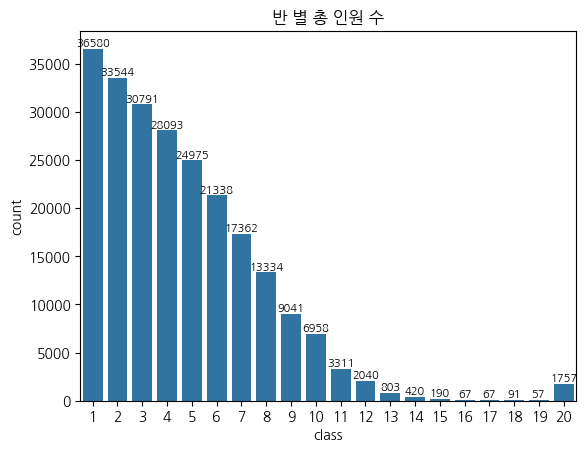

In [26]:
ax = sns.countplot(data=user_properties, x='class')
ax.bar_label(ax.containers[0], fontsize=8)
ax.set_title('반 별 총 인원 수')
plt.show()

In [83]:
max_class = user_properties.groupby('school_id')['class'].max().reset_index(name='max_class')

In [71]:
# set은 중복값을 자동으로 없애주니
# 먼저 set으로 만들고 나중에 list로 바꾸기
class_list = user_properties.groupby('school_id')['class'].apply(set).reset_index(name='class_list')
class_list['class_list'] = class_list['class_list'].apply(list)
class_list

,school_id,class_list
0,1,"[1, 2, 3, 10, 20]"
1,4,"[1, 2, 3, 4, 5, 6, 7, 8, 10]"
2,5,"[1, 2, 3, 4, 5, 6, 7, 8]"
3,6,"[1, 2, 3, 4, 5, 6, 7, 8, 9]"
4,7,"[1, 2, 3, 4, 5, 6, 7]"
...,...,...
5018,5959,[1]
5019,5960,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5020,5961,"[1, 2, 3, 4, 5, 6]"
5021,5963,"[1, 4]"


In [84]:
school_info = pd.merge(class_list, max_class, on='school_id', how='left')
school_info

,school_id,class_list,max_class
0,1,"[1, 2, 3, 10, 20]",20
1,4,"[1, 2, 3, 4, 5, 6, 7, 8, 10]",10
2,5,"[1, 2, 3, 4, 5, 6, 7, 8]",8
3,6,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",9
4,7,"[1, 2, 3, 4, 5, 6, 7]",7
...,...,...,...
5018,5959,[1],1
5019,5960,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12
5020,5961,"[1, 2, 3, 4, 5, 6]",6
5021,5963,"[1, 4]",4


In [115]:
# 학교 별 평균 반 차이 구하기 -> total 리스트에 저장
total = []
for i in range(len(school_info)):  
    cal = []
    for j in range(len(school_info['class_list'].iloc[i])):
        if j != 0:
            now_list = school_info['class_list'].iloc[i]
            minus = now_list[j] - now_list[j - 1]
            cal.append(abs(minus))  # 반 차이 절대값 해줌
    total.append(np.mean(cal))

d:\나\공부\데이터 분석\03_고급_프로젝트\code\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\나\공부\데이터 분석\03_고급_프로젝트\code\.venv\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [110]:
# 학교 별 반 구성, max 반 번호, 평균 반 차이를 구함
school_info['avg_class_diff'] = total
school_info

,school_id,class_list,max_class,avg_class_diff
0,1,"[1, 2, 3, 10, 20]",20,4.750
1,4,"[1, 2, 3, 4, 5, 6, 7, 8, 10]",10,1.125
2,5,"[1, 2, 3, 4, 5, 6, 7, 8]",8,1.000
3,6,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",9,1.000
4,7,"[1, 2, 3, 4, 5, 6, 7]",7,1.000
...,...,...,...,...
5018,5959,[1],1,NaN
5019,5960,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12,1.000
5020,5961,"[1, 2, 3, 4, 5, 6]",6,1.000
5021,5963,"[1, 4]",4,3.000


In [111]:
# 반이 한 개만 있는 학교는 반 차이가 NULL임.
# 어떻게 계산해야 할까??? 
# -> max_class 가 1인 학교는 1로 치환
# 나머지 학교는 우선 무시
school_info[school_info['avg_class_diff'].isnull()]['max_class'].value_counts().reset_index().sort_values(by='max_class')

,max_class,count
0,1,333
1,2,66
2,3,34
3,4,24
5,5,11
4,6,18
6,7,9
8,8,3
9,9,3
10,10,1


In [112]:
# max class 가 1인 학교의 평균 반차이를 1로 바꿔줌
school_info.loc[school_info['max_class'] == 1, 'avg_class_diff'] = 1

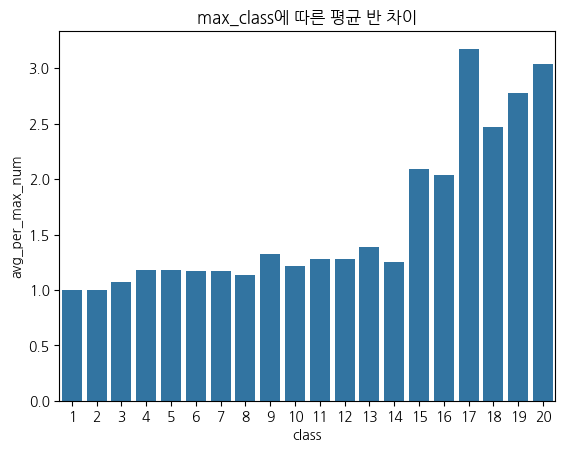

In [114]:
# max 반 번호마다의 평균 반 차이를 구함
# 높은 반 번호를 가질 수록 가짜 반일 확률이 높음
# 높은 반 번호일 수록 반 차이도 많이 날 것임 <- 가설
avg_per_max_num = []
for i in range(1, 21):
    avg = school_info[school_info['max_class'] == i]['avg_class_diff'].mean()
    avg_per_max_num.append(avg)

avg_per_max_df = pd.DataFrame({
    'class': np.arange(1, 21),
    'avg_per_max_num': avg_per_max_num
})

ax = sns.barplot(data=avg_per_max_df, x='class', y='avg_per_max_num')
ax.set_title('max_class에 따른 평균 반 차이')
plt.show()

## votes

In [3]:
accounts_attendance = pd.read_csv('./dumps/votes_csv/accounts_attendance.csv')
accounts_blockrecord = pd.read_csv('./dumps/votes_csv/accounts_blockrecord.csv')
accounts_failpaymenthistory = pd.read_csv('./dumps/votes_csv/accounts_failpaymenthistory.csv')
accounts_friendrequest = pd.read_csv('./dumps/votes_csv/accounts_friendrequest.csv')

accounts_group = pd.read_csv('./dumps/votes_csv/accounts_group.csv')
accounts_nearbyschool = pd.read_csv('./dumps/votes_csv/accounts_nearbyschool.csv')
accounts_paymenthistory = pd.read_csv('./dumps/votes_csv/accounts_paymenthistory.csv')
accounts_pointhistory = pd.read_csv('./dumps/votes_csv/accounts_pointhistory.csv')

accounts_school = pd.read_csv('./dumps/votes_csv/accounts_school.csv')
accounts_timelinereport = pd.read_csv('./dumps/votes_csv/accounts_timelinereport.csv')
accounts_user_contacts = pd.read_csv('./dumps/votes_csv/accounts_user_contacts.csv')
accounts_user = pd.read_csv('./dumps/votes_csv/accounts_user.csv')

accounts_userquestionrecord = pd.read_csv('./dumps/votes_csv/accounts_userquestionrecord.csv')
accounts_userwithdraw = pd.read_csv('./dumps/votes_csv/accounts_userwithdraw.csv')
event_receipts = pd.read_csv('./dumps/votes_csv/event_receipts.csv')
events = pd.read_csv('./dumps/votes_csv/events.csv')

polls_question = pd.read_csv('./dumps/votes_csv/polls_question.csv')
polls_questionpiece = pd.read_csv('./dumps/votes_csv/polls_questionpiece.csv')
polls_questionreport = pd.read_csv('./dumps/votes_csv/polls_questionreport.csv')
polls_questionset = pd.read_csv('./dumps/votes_csv/polls_questionset.csv')
polls_usercandidate = pd.read_csv('./dumps/votes_csv/polls_usercandidate.csv')